In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diamonds = pd.read_csv('../Data/diamonds_hist.csv')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


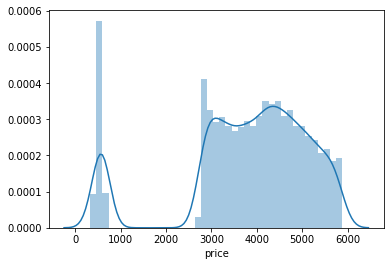

In [71]:
sns.distplot(diamonds.price)

In [21]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [22]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I1' : 1
                }

In [23]:
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [24]:
cut_scale = {
            'Premium' : 5, 
            'Good' : 4, 
            'Very Good' : 3, 
            'Ideal' : 2, 
            'Fair' :1
            }

In [26]:
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)
diamonds['cut_scale'] = diamonds['cut'].map(cut_scale)

In [33]:
diamonds.corr()

,carat,depth,table,price,x,y,z,clarity_scale,cut_scale
carat,1.000000,0.053929,0.157311,0.874228,0.973271,0.972822,0.952797,-0.481569,0.115479
depth,0.053929,1.000000,-0.278467,0.003440,-0.054331,-0.060261,0.165965,-0.042824,-0.189175
table,0.157311,-0.278467,1.000000,0.101080,0.162385,0.153401,0.089611,-0.110059,0.376889
price,0.874228,0.003440,0.101080,1.000000,0.885561,0.893688,0.863258,-0.208091,0.077538
x,0.973271,-0.054331,0.162385,0.885561,1.000000,0.992923,0.954389,-0.436082,0.125298
y,0.972822,-0.060261,0.153401,0.893688,0.992923,1.000000,0.949712,-0.430389,0.106660
z,0.952797,0.165965,0.089611,0.863258,0.954389,0.949712,1.000000,-0.423857,0.066059
clarity_scale,-0.481569,-0.042824,-0.110059,-0.208091,-0.436082,-0.430389,-0.423857,1.000000,-0.103001
cut_scale,0.115479,-0.189175,0.376889,0.077538,0.125298,0.106660,0.066059,-0.103001,1.000000


In [44]:
diamonds['carat'].describe()

count    13181.000000
mean         0.895974
std          0.256887
min          0.200000
25%          0.760000
50%          0.960000
75%          1.040000
max          2.270000
Name: carat, dtype: float64

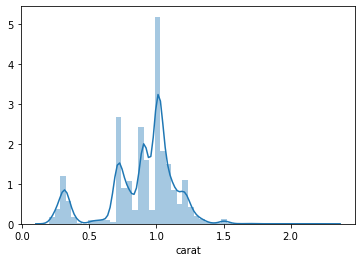

In [35]:
sns.distplot(diamonds.carat)

In [54]:
carat_range = diamonds['carat'].describe()

In [82]:
def caratrange(x):
    
    if x >= carat_range['min'] and x < carat_range['25%']:
        return 'bucket_1'
    elif x >= carat_range['25%'] and x < carat_range['50%']:
        return 'bucket_2'
    elif x >= carat_range['50%'] and x < carat_range['75%']:
        return 'bucket_3'
    elif x >= carat_range['75%'] and x <= carat_range['max']:
        return 'bucket_4'
    else:
        return 'undefined'

In [83]:
diamonds['carat_range'] = diamonds['carat'].apply(caratrange)

In [84]:
diamonds['carat_range'].unique()

array(['bucket_1', 'bucket_2', 'bucket_3', 'bucket_4'], dtype=object)

In [85]:
price_estimate = diamonds.groupby(by='carat_range')['price'].agg(avg_price = 'mean').reset_index()

In [86]:
price_estimate.head()

,carat_range,avg_price
0,bucket_1,2119.582800
1,bucket_2,3776.626414
2,bucket_3,4533.250991
3,bucket_4,4857.400955


In [5]:
rick_diamonds = pd.read_csv('../Data/rick_diamonds.csv')

In [88]:
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [89]:
rick_diamonds['carat_range'] = rick_diamonds['carat'].apply(caratrange)

In [93]:
diamond_ballpark = pd.merge(rick_diamonds, price_estimate, on='carat_range')

In [95]:
diamond_ballpark.head()

,carat,cut,color,clarity,depth,table,x,y,z,carat_range,avg_price
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,bucket_2,3776.626414
1,0.92,Premium,F,SI1,61.8,59.0,6.21,6.25,3.85,bucket_2,3776.626414
2,0.87,Ideal,F,VS1,62.0,55.0,6.10,6.13,3.79,bucket_2,3776.626414
3,0.83,Ideal,D,SI2,62.1,56.0,6.00,6.04,3.74,bucket_2,3776.626414
4,0.94,Premium,E,SI2,60.4,59.0,6.37,6.34,3.84,bucket_2,3776.626414
